<a href="https://colab.research.google.com/github/ongrdamn/ongrdamn/blob/main/02_mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치로 만드는 첫번째 신경망 - MNIST 데이터

GAN 첫걸음, 2020

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# 데이터 파일에 접근하기 위해 드라이브 마운트

from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [7]:
# csv파일을 읽기 위해 pandas 임포트
import pandas

# 이미지를 확인하기 위해 matplotlib 임포트
import matplotlib.pyplot as plt

## Import CSV Data

In [8]:
df = pandas.read_csv('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv', header=None, engine = 'python')

In [ ]:
df.head() #1열이 해당 수의 종류를 표시
#785개인인 이유는는 첫번째째 열이이 포함돼서

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


## Visualise The Data


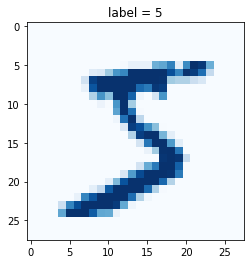

In [ ]:
# 데이터프레임으로부터 데이터 할당
row = 0
data = df.iloc[row] #row를

# 첫 번째 값은 레이블
label = data[0]

# 이미지 데이터는 나머지 784개의 값
img = data[1:].values.reshape(28,28) #data행의 28*28 = 784의 데이터를 정사각형의 모양배열로 바꾼다
plt.title("label = " + str(label)) #
plt.imshow(img, interpolation='none', cmap='Blues') #cmap은 colormap의 약자 #interpolation은 픽셀스무딩 처리
plt.show()

우리는 이제 이러한 데이터를 바탕으로 신경망을 구축하여 어떤 숫자인지 맞추는걸 진행할 것이다.  
신경망 구축에 용이한 배운 pytorch를 이용해보자

#Mnist 분류기 기초  
####(utils 사용없이)

In [9]:
# 라이브러리 임포트

import torch
import torch.nn as nn
from torch.utils.data import Dataset

#DataSet Class

In [10]:
# 데이터셋 클래스

class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        # 이미지 목표(레이블)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # 0-255의 이미지를 0-1로 정규화 
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        
        # 레이블, 이미지 데이터 텐서, 목표 텐서 반환
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    
    pass

#dataset에 대한 클래스를 만들어서 일반화 시킴


#데이터 로드



In [11]:
mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')
#train 데이터를 클래스(위에서 만든거)를 통해 인스턴스(클래스로 만든 변수)로 지정

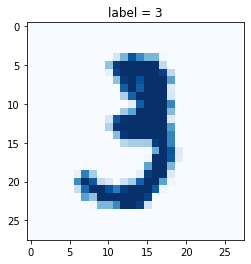

In [12]:
mnist_dataset.plot_image(10) 
#마지막으로 지정한 매소드(클래스 내에 만들어진 함수) plot_image를 사용함

In [13]:
# 데이터셋 클래스가 인덱스로 접근할수 있고, 레이블과 이미지 및 목표 텐서를 반환하는지 확인

mnist_dataset[100]

(5,
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000,

#신경망 클래스

In [14]:
# 분류기 클래스

class Classifier(nn.Module):
    
    def __init__(self):
        # 부모 클래스 초기화
        super().__init__()
        
        # 신경망 레이어 정의 : 어떤식으로 통과시킬꺼야?
        self.model = nn.Sequential(
            nn.Linear(784, 200), #784개의 노드에서 200개 노드로 완전연결  
            nn.Sigmoid(),        #200개의 노드를 sigmoid라는 활성화함수🔗를 통과시켜서 출력!
            nn.Linear(200, 10),  #200개의 노드에서 10개 노드로 완전연결
            nn.Sigmoid()         #최종 10개의 노드를 sigmoid 통과해서 최종출력!
        )
        
        #nn.Linear은 신경망 이동시 선형함수 형태(Ax +b)로 전달돼서!
        #위에서는 디테일 없이 밑그림만 스케치 해놓은 상태 (대충 이런식으로 전개될꺼야~)
        #아래에서는 학습파라미터(가중치, 바이어스)를 어떻게 업데이트(개선)해 나갈지 정한다

        # 손실함수🔗 설정  
        self.loss_function = nn.MSELoss() #가장 일반적인 평균제곱오차를 사용하자

        # SGD 옵티마이저 설정
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01) 
        # 옵티마이저는 최적화 알고리즘을 말한다. 손실함수값이 최소가 되는 지점을 찾는 알고리즘 🔗
        # SGD라고 불리는 확률적 경사하강법을 사용할거다
        # lr은 학습률을 의미한다

        # 변수 초기화
        self.counter = 0 #변수 초기화를 안시키면 누적됨
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # 모델 실행
        return self.model(inputs)
    
    
    def train(self, inputs, targets): #train()을 통해서 위해서 만들어놓은 알고리즘 실행!
        # 신경망의 결과 계산
        outputs = self.forward(inputs) #forward()를 통해 inputs(입력값)을 신경망에 전달
        
        # 손실 계산
        loss = self.loss_function(outputs, targets)

        # 카운터를 증가시키고 10회마다 오차 저장 : 필수는 아니지만 이해를 돕기 위해 설정
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # 기울기 초기화, 역전파 실행🔗, 가중치 갱신(업데이트)
        self.optimiser.zero_grad() #기울기 0으로 초기화
        loss.backward() #손실함수의 기울기 계산
        self.optimiser.step() #학습파라미터 업데이트(갱신)

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

    #보아라 지금까지 우리는 그냥 pytorch에 내장된 함수에 입력값을 넘겨준게 다이다. pytorch는 신경망 학습에 정말 유리하다

더 본격적으로 pytorch를 사용해보자  
torch.utils.data라는 라이브러리를 이용해서  
데이터 처리를 효율적으로 진행할 수 있다


#Mnist 분류기 개선  
####(utlis 사용해서)

In [15]:
from torch.utils.data import Dataset

#Dataset 클래스

In [16]:
# 데이터셋 클래스

class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass
    
    def __len__(self): #데이터셋 길이반환
        return len(self.data_df)
    
    def __getitem__(self, index): #어떤 숫자할껀지 행 정하기
        # 이미지 목표(레이블)
        label = self.data_df.iloc[index,0] #iloc[행,열]
        target = torch.zeros((10)) #[0,0,0,0,0,0,0,0,0,0]
        target[label] = 1.0 #윗윗줄에서 정한 타겟(숫자)를 윗줄에서 만든거에다가 표시
                            #예를들어 5이면 [0,0,0,0,0,1,0,0,0,0] : 이런방식을 원핫 인코딩
        
        # 0-255의 이미지를 0-1로 정규화 🔗
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        #정한 index(숫자)의 행에 담긴 픽셀 값을 처리
        
        # 레이블, 이미지 데이터 텐서, 목표 텐서 반환
        return label, image_values, target
    
    def plot_image(self, index): #matplotlib으로 시각화
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    
    pass



#데이터 로드


In [17]:
mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')

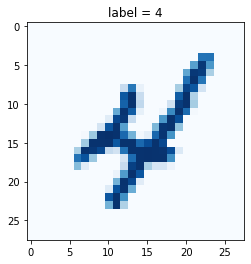

In [18]:
# 이미지 확인

mnist_dataset.plot_image(9) #데이터셋 클래스가 올바르게 짜였는지 확인은 필수!

#신경망 클래스

In [5]:
# 분류기 클래스

class Classifier(nn.Module):
    
    def __init__(self):
        # 부모 클래스 초기화
        super().__init__()
        
        # 신경망 레이어 정의
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )
        
        # 손실함수 설정
        self.loss_function = nn.MSELoss()

        # SGD 옵티마이저 설정
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # 변수 초기화
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # 모델 실행
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # 신경망의 결과 계산
        outputs = self.forward(inputs)
        
        # 손실 계산
        loss = self.loss_function(outputs, targets)

        # 카운터를 증가시키고 10회마다 오차 저장
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # 기울기 초기화, 역전파 실행, 가중치 갱신
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, c ='b', yticks=(0, 0.25, 0.5))
        pass
        #alpha는 투명도
    
    pass

NameError: ignored

####드디어!! 데이터셋 클래스, 신경망 클래스를 만들고  
#신경망 훈련하기

In [28]:
%%time 
# 신경망 생성

C = Classifier()

# MNIST 데이터에 대해 훈련 진행 

epochs = 4

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass
    pass

training epoch 1 of 4
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 4
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 4
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
training epoch 4 of 4
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
CPU times: user 4min 42s, sys: 3.1 s, total: 4min 45s
Wall time: 4min 49s


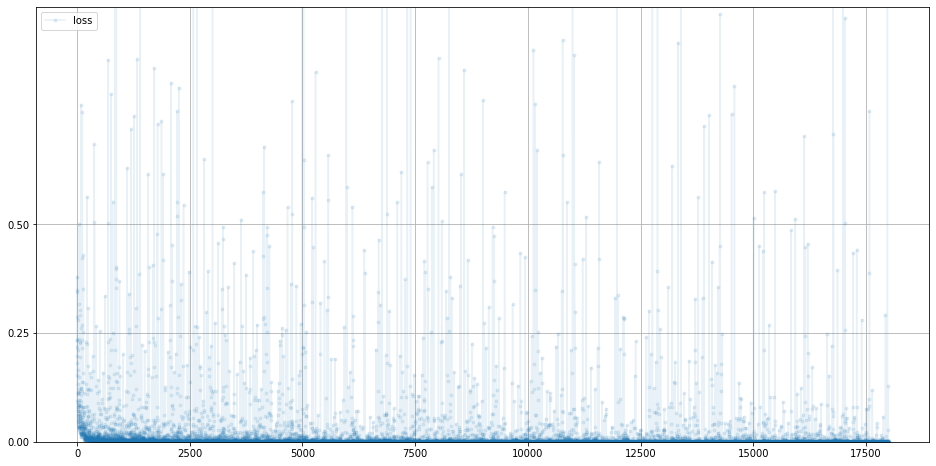

In [44]:
# 분류기 오차 출력

C.plot_progress()

epoch와 신경망을 통과한 입력값의 수가 많을 수록 0으로 오차가 0으로 가까워지는걸 확인할 수 있다  
60000개의 train data를 이용하여 학습시켰다면 10000개의 test data로 분류가 잘되는지 확인해보자  

#신경망에 쿼리(query)하기  
####query란 데이터베이스에서 데이터를 가져온다는 뜻으로  
이곳에선 test 데이터를 불러온다는 뜻!

In [24]:
# MNIST 테스트 데이터 로드

mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_test.csv')

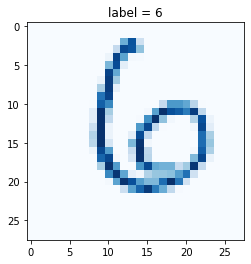

In [26]:
# 레코드 설정
record = 100

# 이미지와 정답 출력
mnist_test_dataset.plot_image(record)

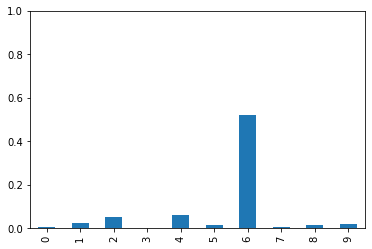

In [30]:
# 신경망으로부터 예측된 답 시각화

image_data = mnist_test_dataset[record][1]

# 훈련된 신경망으로부터 쿼리
output = C.forward(image_data)

# 출력 텐서 플롯
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

# 결과를 보면 숫자에 대한 확률이 0인것은 없다

In [31]:
#맞출때마다 점수를 더해서 최종적으로 얼마만큼 분류해내는지 코드를 짜보자
# 훈련된 신경망을 테스트 데이터셋에 대해 테스트

score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    
    pass

print(score, items, score/items)


8813 10000 0.8813


#성능 향상 기법 - 개선된 MNIST 분류기  
어떻게 하면 더 성능으로 올릴 수 있을까?  
우리가 바꿔줄만한 요소는 뭐가 있을까?  
**신경망 층의 개수? 손실함수? 옵티마이저? 활성화 함수?**

###DataSet 클래스는 위에서 사용했던 MnistDAtaset 클래스를 사용하자

In [32]:
mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')

#신경망 클래스

In [33]:
# 분류기 클래스

class Classifier(nn.Module):
    
    def __init__(self):
        # 부모 클래스 초기화
        super().__init__()
        
        # 신경망 레이어 정의
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            #nn.Sigmoid(),
            nn.LeakyReLU(0.02),
            #Sigmoid 함수에서 LeakyReLU함수로 활성화 함수가 바뀌었다!
            #LeakyReLU는 0이하의 값에 대해서 0으로 소실되는 문제를 개선한 활성화함수이다
            #0.02는 기울기 값이다.

            nn.LayerNorm(200),
            
            nn.Linear(200, 10),
            nn.Sigmoid()
            #nn.LeakyReLU(0.02)
        )
        
        # 손실함수 설정
        self.loss_function = nn.BCELoss()
        #self.loss_function = nn.MSELoss()
        #BCE는 이진 교차 엔트로피 손실함수로 기존의 평균 제곱오차에서의 단점을 보완해서
        #이름대로 오차가 쫌 크다 싶으면 확실하게 버려서 페널티를 주는 방식으로 진행된다.
        #자세한건 아까의 손실함수 관련 링크를 참고하자

        # 옵티마이저 설정
        #self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        self.optimiser = torch.optim.Adam(self.parameters())
        #Adam은 현존하는 옵티마이저중에서 거의 가장 뛰어나다고 할 수 있다.
        #Adam이 global minimum을 찾는 방법은 아까의 링크를 참고하자

        # 변수 초기화
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # 모델 실행
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # 신경망의 결과 계산
        outputs = self.forward(inputs)
        
        # 손실 계산
        loss = self.loss_function(outputs, targets)

        # 카운터를 증가시키고 10회마다 오차 저장
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # 기울기 초기화, 역전파 실행, 가중치 갱신
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

#신경망 훈련하기

In [34]:
%%time 
# 신경망 생성
# 아까꺼에 비해서 시간이 얼마나 차이나는지도 확인해보자

C = Classifier()

# MNIST 데이터에 대해 훈련 진행 

epochs = 3

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass
    pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 11min, sys: 6.6 s, total: 11min 6s
Wall time: 11min 25s


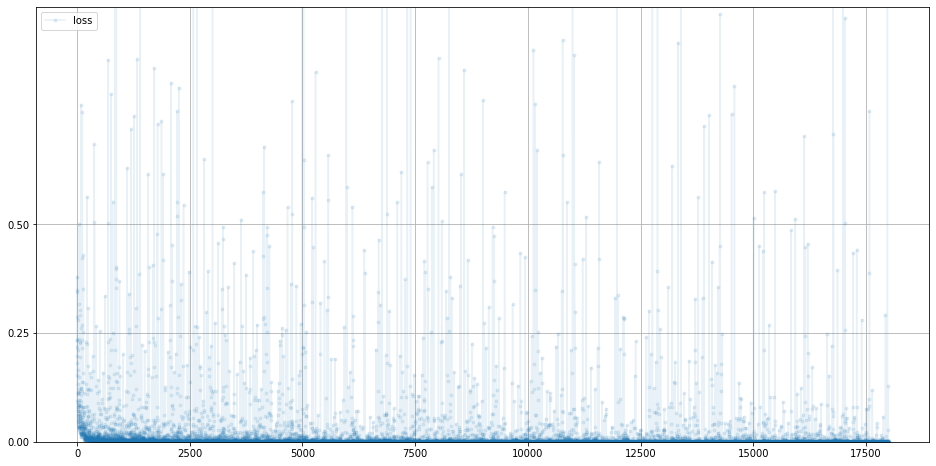

In [36]:
# 분류기 오차 출력

C.plot_progress()
# 오차가 확실히 초반부부터 0을 향해서 가긴하지만 흥미로운점은 훈련 후반부에도 오차가 큰 값들이 여전히 많다는 것

이제 새롭게 훈련시킨 모델을 한번 테스트해봅시다

In [38]:
# MNIST 테스트 데이터 로드
mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_test.csv')

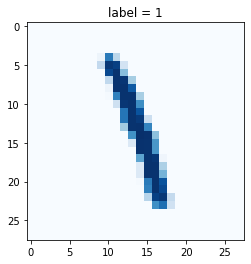

In [41]:
# 레코드 설정
record = 191

# 이미지와 정답 출력
mnist_test_dataset.plot_image(record) 

#이건 데이터 로드하면 항상 확인해야겠쥬?

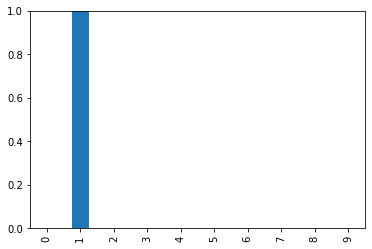

In [42]:
# 신경망으로부터 예측된 답 시각화

image_data = mnist_test_dataset[record][1]

# 훈련된 신경망으로부터 쿼리
output = C.forward(image_data)

# 출력 텐서 플롯
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

#결과가 어떠한가 아까 것에 비하여 분류기의 선택이 명확해진걸 확인할 수 있다
#내 생각에는 BSE손실함수가 확실한 거르기(?)를 해서 그렇지 않나 생각이든다.

#시간이 남는다면 위에서 신경망 훈련 코드에서 세번째 출력값을 두번째 출력값처럼 LeakyReLU에 통과 시켜보자

#분류기 성능

In [43]:
# 훈련된 신경망을 테스트 데이터셋에 대해 테스트

score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    
    pass

print(score, items, score/items)
#확실하게 오른 성적(?)을 볼 수 있다

9739 10000 0.9739


###**핵심정리**
1. 새로운 데이터를 다루거나 만들때, 데이터를 미리 살펴보고 제대로 로딩되었는지(ex: head로 pandas행 확인)확인하는 습관을 가지자
2. pytorch는 머신러닝 훈련시 많은 작업을 대신해준다.  
3. 위에서 확인한 그래프처럼 훈련의 진행 척도를 볼 수 있는 손실값을 시각화하는게 좋다.  
4. MSE(평균제곱오차)는 연속형 변수의 회귀문제에 적합하고   
   BCE(이진 교차 엔트로피)와 같은 엔트로피는 Y/N이나 1/0으로 나뉘는 이산형 변수에 적합하다.
   상황에 따라서 적절하게 손실함수를 정하자.
5. sigmoid함수는 너무 작고 큰 값에 대해서 기울기 소실문제가 발생한다.  
   ReLU 활성화 함수는 소실없이 1차함수꼴의 일정한 기울기를 가진다.
   LeakyRELU는 음의 input에 대해서도 약간의 기울기를 부여하여 RELU를 보완한다.
6. Adam 옵티마이저(최적화 알고리즘)은 국소 최적해(local minimum) 문제를 해결하여 파라미터마다  
   다른 학습률을 적용한다. 모든 데이터에 대해 부분부분 나누어 판단후 움직여서 국소 최적해 문제가  
   생길 수 있는 SGD(확률적 경사하강법)보다 성능이 낫다.  
7. 정규화는 값의 크기를 줄여줌에 따라서 노이즈 결과방지와 신경망 훈련을 안정화 시켜준다.  
   LayerNorm을 통해서 가중치같은 학습파라미터들을 정규화 할 수 있고 이는 더 나은 성능을 유도한다.
8. 신경망을 훈련시킬때는 정방향으로 신호를 처리하고 역전파를 통해서 가중치를 업데이트(오차가 최소가 되는 방향으로)했다.

#CUDA와 인공지능 개발에 GPU가 필요한 이유를 알아보자

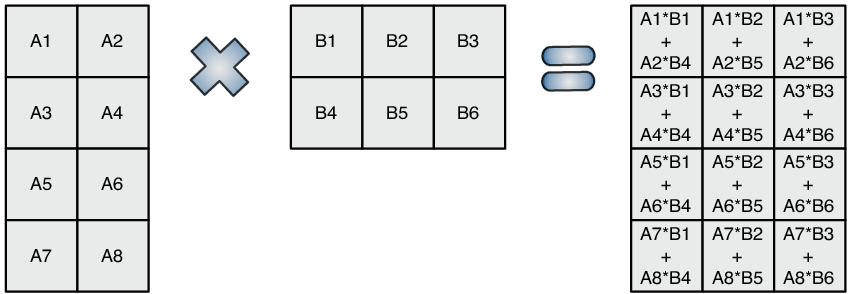

위에서 보는 것은 행렬곱의 연산이다.
우리는 위에서 28*28 크기의 행렬을 이용해서 신경망을 옯겨이동할때 행렬곱을 시행했다.<br>
1학기때 배운 numpy를 기억하는가?<br>
numpy는 행렬연산에 최적화 되어있고 행렬연산은 인공지능에 필수적이다.<br>


##numpy와 python코드 실행시간 비교(행렬곱)

In [ ]:
import numpy as np
import random
import time

size = 100
size1 = 30
size2 = 40
a = np.random.rand(size1, size) #성분이 0~1인 30*100짜리 행렬
b = np.random.rand(size, size2) #성분이 0~1인 100*40짜리 행렬
#행렬 a,b를 만들어줬다

start = time.time() #스톱워치 시작
c1 = np.dot(a,b)
nptime = time.time()-start #종료시간 - 시작시간

print('time:', nptime)
print(c1)
print(c1.shape)

In [4]:
%%timeit

c1 = np.dot(a,b) #이렇게 구할 수도 있다, 둘 값이 왜 차이나는지는 모르겠다...

13 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
import numpy as np
import random
import time

start = time.time()  # 시작 시간 저장

size = 100 #첫번째 행렬 열 수, 두번째 행렬 행 수 >>> 이건 맞춰줘야함
size1 = 30 #첫번째 행렬 행 수
size2 = 40 #두번째 행렬 열 수

#a = np.random.rand(size1, size) #첫번째 행렬
#b = np.random.rand(size,size2)  #두번째 행렬

c2 = []
ctot = []
sour = 0
for i in range(size1):
  for j in range(size2):
    for k in range(size):
      sour += a[i][k]*b[k][j] #첫번째 행렬에서 행고정 후 옆으로 주르륵, 두번째 행렬에서 열고정 후 아래로 주르륵
    c2.append(sour)        
    sour = 0                  
  ctot.append(c2) #첫번째 행렬의 행에 대해서 끝나면 새롭게 만들어진 행 더하기
  c2 = [] #초기화

pytime = time.time() - start
print('time :', pytime)  # 현재시각 - 시작시간 = 실행 시간, 여기서 &&timeit을 안쓴 이유는 timeit은 무언가 한줄? lambda같은걸 쓴 함수식에 주로 사용하는거 같다
ctot = np.array(ctot)
print(ctot)
print(ctot.shape)

time : 0.07759523391723633
[[22.72728074 25.34829561 25.76655162 ... 22.81746067 22.9249629
  19.63838175]
 [24.28118806 27.21325176 24.79780087 ... 24.26429225 22.90042612
  20.88852058]
 [23.10077507 24.95586874 21.90702996 ... 21.746539   22.34847248
  20.42457496]
 ...
 [24.99554952 29.46467487 26.19481734 ... 25.81952724 25.52399307
  22.22081509]
 [23.30395549 24.95603762 25.02273615 ... 22.55284229 24.66732602
  22.93215781]
 [23.15444632 25.46772398 24.85749601 ... 22.32053693 24.34958214
  21.95450826]]
(30, 40)


In [7]:
print(pytime/nptime)
#대략 500배에서 많게는 1000배도 차이가 난다
#numpy가 최고네!!!라고 생각하기엔...
#아직 하나가 더 남았다

21.383574244415243


numpy같은 효율적인 라이브러리를 사용하고도 인공지능 개발자들은 시간이 부족하다고 생각했고  
컴퓨터언어의 영역을 넘어선 하드웨어의 영역이 관여하기 시작한다...

##**그 이름은 바로 GPU !!! 🔗**
####(참고로 numpy는 CPU를 사용하면서 단지 효율적으로 계산하는거다)

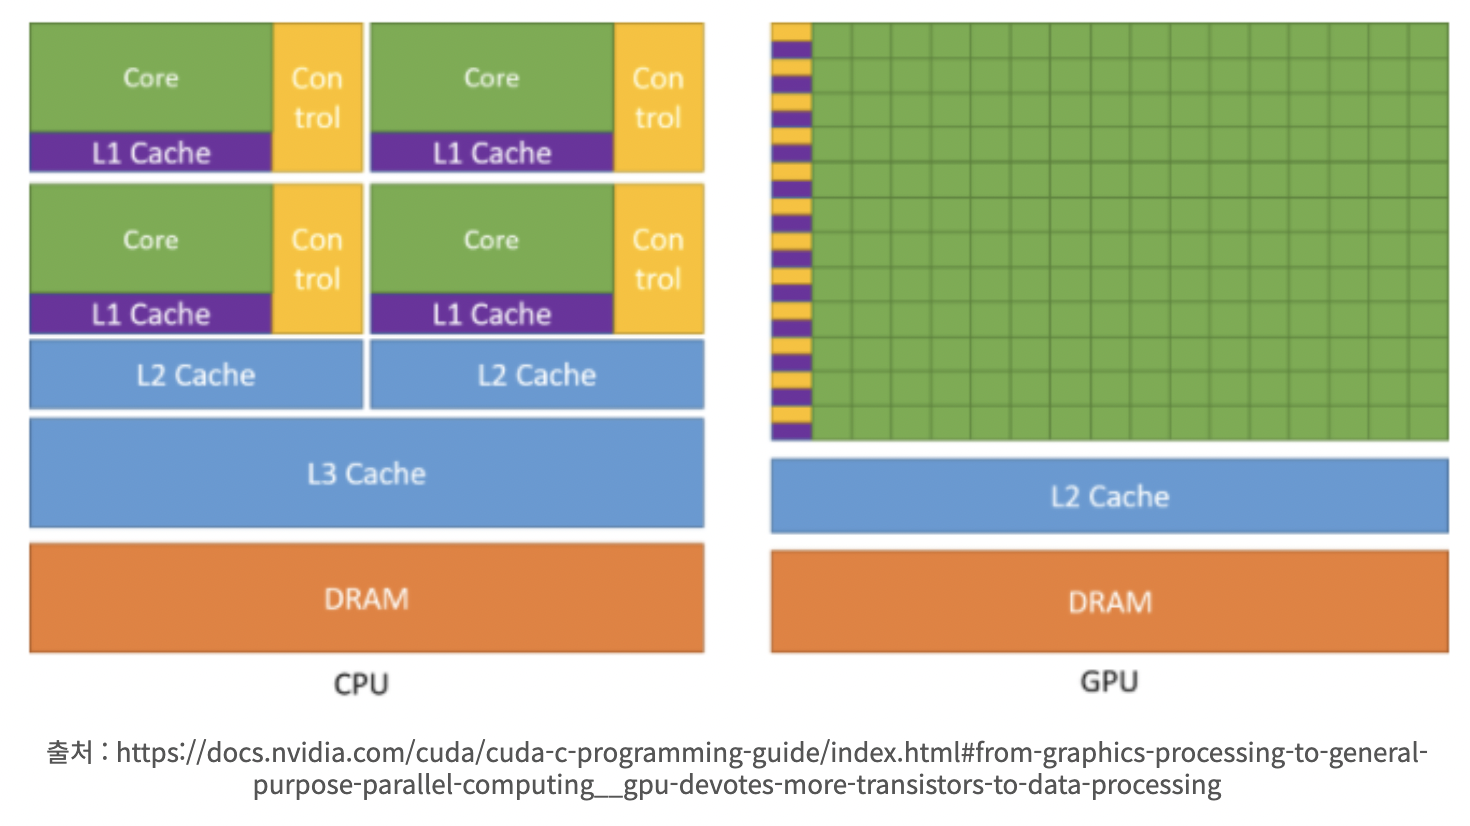

CPU는 박사님 1명, GPU는 중학생 100명이라고 생각해도 무방하다  
GPU는 행렬곱과 같은 단순계산에 능하다  
한꺼번에 많은 코어들이 병렬적으로 연산을 하기 때문이다<br><br>
역할은 CPU는 복잡하고 순차적인거, GPU는 간단하고 방대한거이다  
2006년 미국의 반도체 회사 NVIDIA는 사용자들의 프로그래밍을 돕기 위해서 CUDA라는 이름의 소프트웨어를 출시<br>
CUDA의 특징은 CPU와 GPU를 위에서 설명한 역할에 맞게 사용하게끔 프로그래밍 되어 있다<br>
(어려우면 CPU 시키고, 노가다면 GPU 시키고..)
유일한 단점은 자사의 GPU를 사용할때만 작동한다는것....<br>
###**그래서 우리는 Colab을 사용할꺼다 !!**

COLAB은 우리가 요청한 코드에 대해서 가상머신에서 CPU와 GPU를 이용하여 실행시켜준다!!<br>
(12시간 연속은 안됨..)

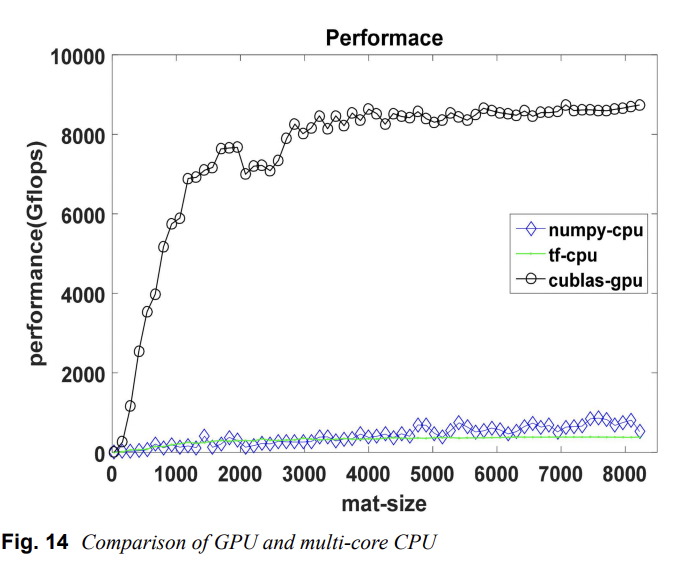

###작은 크기의 행렬에 대해서는 numpy가 우수하다가 이내 CUDA가 압도한다  
###하드웨어의 중요성을 다시금 느끼는 순간이다..🙂

#GPU에서 텐서 이용하기 (런타임 유형을 GPU로 먼저 변경 !)

In [ ]:
# GPU에서 텐서 생성

x = torch.cuda.FloatTensor([13.535]) #텐서 변수 정의 cuda포함하면 gpu에서 텐서를 만들 수 있다
x.type()

In [14]:
# 텐서가 GPU에 설정되어 있는지 확인
x.device

device(type='cuda', index=0)

In [15]:
# GPU를 통해 텐서 계산
y = x * x
y

tensor([183.1962], device='cuda:0')

#CUDA 성능 확인하기

In [2]:
# numpy 행렬로부터 cuda 텐서 생성
import torch
import random
import numpy as np

ae1 = np.random.rand(10000,20000)
be1 = np.random.rand(20000,10000)

ae2 = torch.cuda.FloatTensor(ae1)
be2 = torch.cuda.FloatTensor(be1)

In [3]:
%%timeit

ce2 = torch.matmul(ae2, be2)

#행렬이 무척큰데도 실행 시간이 무척 짧은걸 볼 수 있다!

The slowest run took 4.65 times longer than the fastest. This could mean that an intermediate result is being cached.
42.8 µs ± 31.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


#CUDA 설정 확인하기

In [4]:
# CUDA가 이용가능한지 확인
# 가능하다면, 기본 텐서 타입을 cuda에 설정

if torch.cuda.is_available():
  torch.set_default_tensor_type(torch.cuda.FloatTensor)
  print("using cuda:", torch.cuda.get_device_name(0))
  pass

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

#런타임 유형이 NONE이면 cpu라고 나오고, GPU이면 사용되는 gpu의 이름이 나온다

#결과로 나오는 Tesla T4의 테슬라는 그저 이름일뿐 전기자동차 기업과 관련없다...
#사실 있긴하다 이제는 아니지만ㅜ 예전에 tesla에서 NVIDIA의 gpu를 사용한다고 밝혔다

using cuda: Tesla T4


device(type='cuda')

##핵심정리 
1. GPU는 많은 연산코어로 빠른 연산처리를 한다. 원래는 그래픽 처리(이건 나중에 설명해주겠움) 사용되었지만 행렬이 자주 사용되는 인공지능에도 자주 사용됨
2.CUDA는 엔비디아의 연산용 프로그래밍 프레임워크이고, cpu와 gpu를 유기적으로 사용한다. pytorch의 큰 이탈없이 그대로 사용가능하다.
3.대략적으로 cpu보다 gpu가 150배 빠르다
4.데이터가 충분히 크지 않다면 gpu의 사용이 의미가 없다
